<a href="https://colab.research.google.com/github/lmillard79/GoogleColabs/blob/master/Peaks_Overthreshold_Jan2020_Seasonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
import sys
!{sys.executable} -m pip install scipy==0.19.1
import scipy as s
print (s.__version__)
from scipy.stats import genpareto, poisson
import numpy as np
import os
import seaborn as sns
sns.set_style('darkgrid')

!{sys.executable} -m pip install lmoments3
import lmoments3 as lm
from lmoments3 import distr

%matplotlib inline



0.19.1


In [0]:
ReportFlows = "Table10-1_DesignFlows.csv"

URBSInflow = pd.read_csv(ReportFlows,skiprows=1,usecols=[0,3],skipfooter=1)
URBSInflow['AEP'] = 1./URBSInflow['1 in _']
URBSInflow = URBSInflow.set_index('AEP')
URBSInflow = URBSInflow.drop('1 in _',axis=1)
URBSInflow.columns = ['LMD_URBS']
URBSInflow



,LMD_URBS
AEP,
2.000000e-01,259.0
1.000000e-01,336.0
5.000000e-02,402.0
2.000000e-02,444.0
1.000000e-02,507.0
5.000000e-03,615.0
2.000000e-03,730.0
1.000000e-03,826.0
5.000000e-04,931.0


In [0]:
ffa= pd.read_csv('/content/MooloolahGauge_HistFFAs.csv')
ffa['AEP'] = 1./ffa['1 in Y AEP']
ffa = ffa.set_index('AEP')
ffa = ffa.drop('1 in Y AEP',axis=1)
cols = ffa.columns
ffa[cols] = ffa[cols].apply(pd.to_numeric, errors='coerce')

ffa

,TMR 2016 (m3/s),SCC Cardno revised FFA (m3/s),Aurecon 2014 (m3/s),Kinhill 1997 (m3/s),LPIII (this report) (m3/s)
AEP,,,,,
0.5000,93.0,132.0,115.0,NaN,90.0
0.2000,170.0,201.0,162.0,NaN,190.0
0.1000,222.0,251.0,188.0,164.0,250.0
0.0500,273.0,301.0,222.0,222.0,300.0
0.0200,342.0,370.0,275.0,229.0,360.0
0.0100,395.0,423.0,323.0,255.0,390.0
0.0050,NaN,480.0,NaN,NaN,NaN
0.0005,635.0,NaN,NaN,NaN,NaN


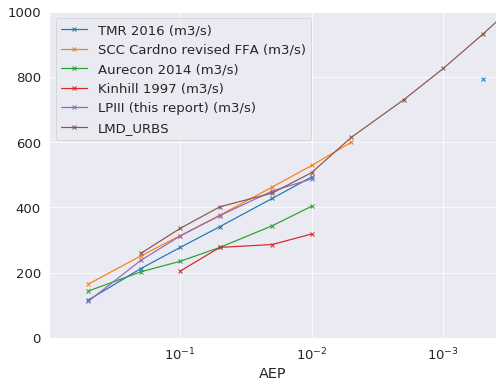

In [0]:
FFA2 = pd.concat([ffa*1.25,URBSInflow],axis=1)

FFA2.plot(logx=True,marker='x',xlim=(0.995,0.0004),ylim=(0,1000),figsize=(8,6))


In [0]:
FFA2

,level_0,index,AEP,TMR 2016 (m3/s),SCC Cardno revised FFA (m3/s),Aurecon 2014 (m3/s),Kinhill 1997 (m3/s),LPIII (this report) (m3/s),LMD_URBS,aep
0,0,0,1.000000e-07,NaN,NaN,NaN,NaN,NaN,2106.0,0.000010
1,1,1,1.000000e-06,NaN,NaN,NaN,NaN,NaN,1909.0,0.000100
2,2,2,2.000000e-06,NaN,NaN,NaN,NaN,NaN,1819.0,0.000200
3,3,3,3.333333e-06,NaN,NaN,NaN,NaN,NaN,1745.0,0.000333
4,4,4,1.000000e-05,NaN,NaN,NaN,NaN,NaN,1580.0,0.001000
5,5,5,2.000000e-05,NaN,NaN,NaN,NaN,NaN,1466.0,0.002000
6,6,6,1.000000e-04,NaN,NaN,NaN,NaN,NaN,1194.0,0.010000
7,7,7,2.000000e-04,NaN,NaN,NaN,NaN,NaN,1078.0,0.020000
8,8,8,5.000000e-04,793.75,NaN,NaN,NaN,NaN,931.0,0.050000
9,9,9,1.000000e-03,NaN,NaN,NaN,NaN,NaN,826.0,0.100000


TMR 2016 (m3/s)                  float64
SCC Cardno revised FFA (m3/s)    float64
Aurecon 2014 (m3/s)              float64
Kinhill 1997 (m3/s)              float64
LPIII (this report) (m3/s)       float64
LMD_URBS                         float64
dtype: object

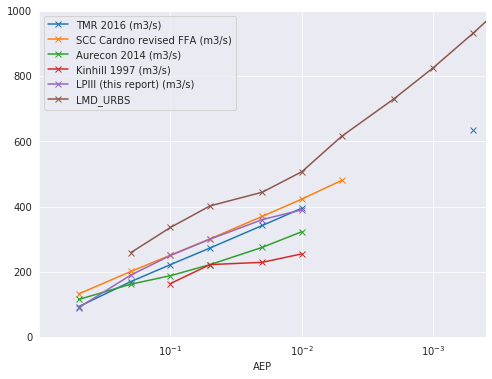

In [0]:
FFA = pd.concat([ffa,URBSInflow],axis=1)

FFA.plot(logx=True,marker='x',xlim=(0.995,0.0004),ylim=(0,1000),figsize=(8,6))
FFA.dtypes

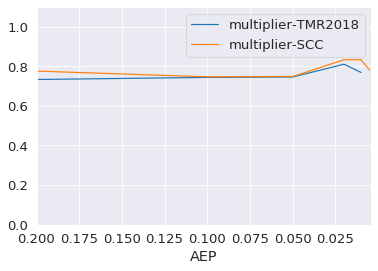

In [0]:
FFA['multiplier-SCC'] = FFA['SCC Cardno revised FFA (m3/s)'] / FFA['LMD_URBS']
FFA['multiplier-TMR2018'] = FFA['LPIII (this report) (m3/s)'] / FFA['LMD_URBS']
FFA[['multiplier-TMR2018', 'multiplier-SCC']].dropna(how='all').plot(xlim=(0.2,0.004),ylim=(0,1.1))

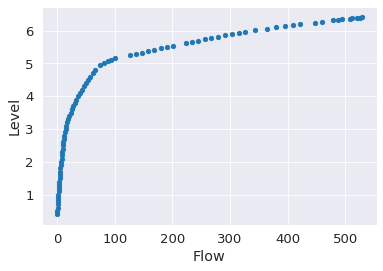

In [0]:
reRated = pd.read_excel('/content/MooloolahGauge_Re-rated_TMR-2018.xlsx',skiprows=[0,1,2,4],usecols=[0,2])
reRated.plot.scatter(x='Flow',y='Level')

[1.34086494e-03 6.93941292e+00]


(-5, 200)

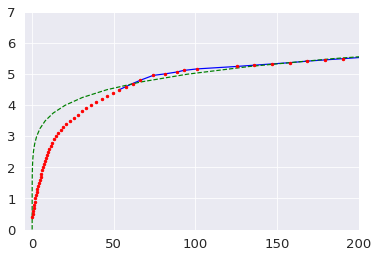

In [0]:
from scipy.optimize import curve_fit

def func(H, a, b):
    return a * H ** b #np.exp(b * H) 

lowFlows = reRated[reRated['Flow']>50]

xdata = lowFlows['Level']
ydata = lowFlows['Flow']
plt.plot(ydata, xdata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)#, bounds=(0, [3., 1.6]))
print(popt)
xdata2 = np.arange(0,15,0.25)

X = reRated['Flow']
Y = reRated['Level']
plt.plot(func(xdata2, *popt), xdata2, 'g--',
         label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(X,Y,'r.')
plt.ylim(0,7)
plt.xlim(-5,200)

[0.54048947 3.04699685]


(-5, 200)

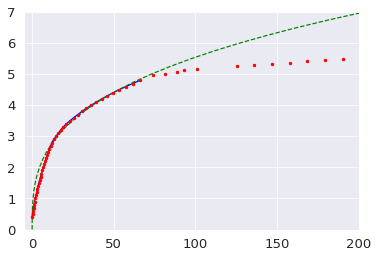

In [0]:
lowFlows = reRated[reRated['Flow']<70]

xdata = lowFlows['Level']
ydata = lowFlows['Flow']
plt.plot(ydata, xdata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)#, bounds=(0, [3., 1.6]))
print(popt)
xdata2 = np.arange(0,15,0.25)

X = reRated['Flow']
Y = reRated['Level']
plt.plot(func(xdata2, *popt), xdata2, 'g--',
         label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(X,Y,'r.')
plt.ylim(0,7)
plt.xlim(-5,200)

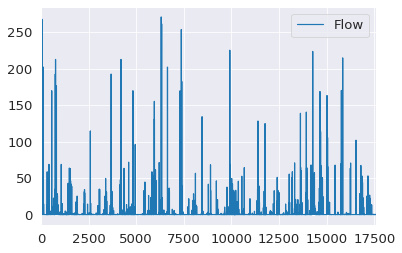

In [0]:
level = pd.read_csv('/content/141006A_H.csv',usecols=[5],skiprows=5,skipfooter=4)
level.columns = ['GaugeHeight']

level['Flow'] =np.where(level['GaugeHeight']<5, 0.540* level['GaugeHeight']**3.047, 0.00134 * level['GaugeHeight']**6.93)
level[['Flow']].plot()

level.to_csv('ReRatedFlowsMooloolah.csv')

In [0]:
df

,Max,Month,Season
Date,,,
1971-12-16,0.000000,12,Summer
1971-12-17,0.000000,12,Summer
1971-12-18,0.000000,12,Summer
1971-12-19,0.000000,12,Summer
1971-12-20,0.000000,12,Summer
...,...,...,...
2019-03-15,22.086000,3,Autumn
2019-03-16,31.757000,3,Autumn
2019-03-17,1.330875,3,Autumn


In [0]:
## Mooloolah Only
sns.set_style('darkgrid')#,{'xtick.bottom': True})
sns.set_context('paper',font_scale=1.5)
fin = '141006A_H.csv' 

DailyData = [fin]
Locations = ['Mooloolah (39km$^2$)']
Factors = [1.0]
Thresholds = [[55,25,18,28,30]]

for jj, fin in enumerate(DailyData):
    
    Location =  Locations[jj]
    df = pd.read_csv(fin,usecols=[0,5],skiprows=3,index_col=0,skipfooter=3,infer_datetime_format=True,dayfirst=True)
    
    df['Flow'] = np.where(df['Max']<5, 0.540* level['Max']**3.047, 0.00134 * level['Max']**6.93)
    df = df.dropna()
    df['Date'] = pd.to_datetime(df.index)
    df['Month'] = df['Date'].map(lambda x: x.month)
    df['Season'] = df['Month'].apply(getSeason)
    df = df.set_index('Date')
    maxWeek = df.resample('W').max()
   
    listDFs = [maxWeek]
    seasons = ['AllYear']
    thresholds = [10,10,5,10,10]#Thresholds[jj] #[35,13,8,18,18]

    colours = ['orangered','dodgerblue','seagreen','darkkhaki','darkblue']
    factor_Season = 1.0

    fig,ax=plt.subplots(figsize=(14,8))


    for ii, POT_filt in enumerate(listDFs): 
        threshold = thresholds[ii]
        season = seasons[ii]
        POT_filt = POT_filt[POT_filt['Flow']>threshold]

        ## Bring in the Peak over Threshold data 
        records = POT_filt.shape[0]

        W = POT_filt['Flow'].values.max()
        qo = POT_filt['Flow'].values.min()

        ## Some basic descriptors​POT_filt = POT_filt[POT_filt['Max']>threshold]

        years_of_record = (POT_filt.index[-1]-POT_filt.index[0]).days
        peaks_over_threshold = POT_filt['Max'].count()

        # the v character
        averagePOT = peaks_over_threshold/years_of_record

        ### Find the L Moments using Gen Pareto distribution (GPA)
        data = POT_filt['Max'].values
        paras = distr.gpa.lmom_fit(data)

        # Plotting position Eqn 3.2.79 finds AEP so second step converts back to EY
        POT_rank = POT_filt
        POT_rank['rank'] = POT_rank['Max'].rank(ascending=False)

        ##  Eqn 3.2.36 n = no. years i = rank AEP probability
        # Average interval between exceedances of given discharge (ARI)
        POT_rank['T'] = (years_of_record + 0.2) / (POT_rank['rank'] - 0.4)  
        POT_rank['t'] = (1/POT_rank['T'])
        POT_rank['w_EY'] = paras['loc'] - paras['scale']*np.log(POT_rank['t']/averagePOT)
        POT_rank['t2'] = (1/POT_rank['T'])*100
        #POT_rank['t2season'] = (POT_rank['t2'])*4

        ##  convert EYs to AEPs
        POT_rank['AEPs_t2'] = (np.exp(POT_rank['t2'])-1)/ np.exp(POT_rank['t2'])*100.
        #POT_rank['AEPs_t2season'] = (np.exp(POT_rank['t2season'])-1)/ np.exp(POT_rank['t2season'])*100.

        ## Eqn 3.2.86 Log transformation plotting position   - Had to add =1.0 to get it to bisect the plotted data
        POT_rank.plot(x='AEPs_t2',y='w_EY',c='0.5', linestyle='--',label=season,ax=ax,linewidth=1.5) 
                 
        ax.axvline(95.02,c='c',linestyle='--',alpha=0.5)  # 95% ~ once a month 1 in 3
        ax.text(94,50/Factors[jj],'Once a month',rotation=90)
        
        ax.axvline(63.2,c='c',linestyle='--',alpha=0.5)  # 95% ~ once a month 1 in 3
        ax.text(62,130/Factors[jj],'Once a season',rotation=90)
       
        #ax.text(68,92,'Points represent unbiased \nCunnane plot position')
        ax.semilogx()
        plt.tick_params(axis='x',which='minor')
        ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f%%'))

        ax.grid(True,zorder=0)        
        ax.grid(which='both',axis='both',zorder=0,linewidth=2)
        ax.grid(which='major',axis='x',zorder=0,linewidth=5)

        ax.set_xlim(100,19)
        ax.set_ylim(1,130)
        ax.legend(title='Gen Pareto Fitted Data')
        
        
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos:'%.0f%%'%x))
        
        ax.set_xlabel('Annual/Seasonal Exceedance Probability \n63.2% AEP = 1 in 1 ARI / EY')
        ax.set_ylabel('Synthetic Lake Macdonald peak flow rate (m$^3$/s)')
        
    plt.tight_layout()
    
    #fig.savefig(pout+'PartialSeries_%s_-AllData_AllSeasons05-AEPs.png' %Location,dpi=300)

KeyError: ignored

In [0]:
## Mooloolah Only
sns.set_style('darkgrid')#,{'xtick.bottom': True})
sns.set_context('paper',font_scale=1.5)
fin = '141006A_H.csv' 

def getSeason(month):
    #month = int(date.split("/")[0])
    if (month == 12 or month <= 2):
       return "Summer"

    elif (month >=3 and month <= 5):
       return "Autumn"

    elif (month >=6 and month <= 8):
       return "Winter"

    elif (month >=9 and month <= 11):
       return "Spring"

    else:
       return "Error"


DailyData = [fin]
Locations = ['Mooloolah (39km$^2$)']#,'Eudlo (62km$^2$)','Eumundi (38km$^2$)']
Factors = [1.12,0.81,1.14]
Thresholds = [[55,25,18,28,30],[30,14,8,21,15],[30,19,13,22,20]]

for jj, fin in enumerate(DailyData):
    
    Location =  Locations[jj]
    df = pd.read_csv(fin,usecols=[0,5],skiprows=3,index_col=0,skipfooter=3,infer_datetime_format=True,dayfirst=True)
    
    df['Flow'] = np.where(df['Max']<5, 0.540* level['Max']**3.047, 0.00134 * level['Max']**6.93)
    df = df.dropna()
    df['Date'] = pd.to_datetime(df.index)
    df['Month'] = df['Date'].map(lambda x: x.month)
    df['Season'] = df['Month'].apply(getSeason)
    df = df.set_index('Date')
    maxWeek = df.resample('W').max()

    maxWinter = maxWeek[maxWeek['Season']=='Winter']
    maxSpring = maxWeek[maxWeek['Season']=='Spring']
    maxSummer = maxWeek[maxWeek['Season']=='Summer']
    maxAutumn = maxWeek[maxWeek['Season']=='Autumn']

    
    listDFs = [maxSummer,maxWinter,maxSpring,maxAutumn,maxWeek]
    seasons = ['Summer','Winter','Spring','Autumn','AllYear']
    thresholds = [10,10,5,10,10]#Thresholds[jj] #[35,13,8,18,18]

    colours = ['orangered','dodgerblue','seagreen','darkkhaki','darkblue']
    factor_Season = 1.0

    fig,ax=plt.subplots(figsize=(14,8))


    for ii, POT_filt in enumerate(listDFs): 
        threshold = thresholds[ii]
        season = seasons[ii]
        POT_filt = POT_filt[POT_filt['Flow']>threshold]

        ## Bring in the Peak over Threshold data 
        records = POT_filt.shape[0]

        W = POT_filt['Flow'].values.max()
        qo = POT_filt['Flow'].values.min()

        ## Some basic descriptors​POT_filt = POT_filt[POT_filt['Max']>threshold]

        years_of_record = (POT_filt.index[-1]-POT_filt.index[0]).days
        peaks_over_threshold = POT_filt['Max'].count()

        # the v character
        averagePOT = peaks_over_threshold/years_of_record

        ### Find the L Moments using Gen Pareto distribution (GPA)
        data = POT_filt['Max'].values
        paras = distr.gpa.lmom_fit(data)

        # Plotting position Eqn 3.2.79 finds AEP so second step converts back to EY
        POT_rank = POT_filt
        POT_rank['rank'] = POT_rank['Max'].rank(ascending=False)

        ##  Eqn 3.2.36 n = no. years i = rank AEP probability
        # Average interval between exceedances of given discharge (ARI)
        POT_rank['T'] = (years_of_record + 0.2) / (POT_rank['rank'] - 0.4)  
        POT_rank['t'] = (1/POT_rank['T'])
        POT_rank['w_EY'] = paras['loc'] - paras['scale']*np.log(POT_rank['t']/averagePOT)
        POT_rank['t2'] = (1/POT_rank['T'])*100
        POT_rank['t2season'] = (POT_rank['t2'])*4

        ##  convert EYs to AEPs
        POT_rank['AEPs_t2'] = (np.exp(POT_rank['t2'])-1)/ np.exp(POT_rank['t2'])*100.
        POT_rank['AEPs_t2season'] = (np.exp(POT_rank['t2season'])-1)/ np.exp(POT_rank['t2season'])*100.

        ## Eqn 3.2.86 Log transformation plotting position   - Had to add =1.0 to get it to bisect the plotted data
        if season == 'AllYear':    
            POT_rank.plot(x='AEPs_t2',y='w_EY',c='0.5', linestyle='--',label=season,ax=ax,linewidth=1.5) 
            #pass
                 
        else:
            POT_rank.plot.scatter(x='AEPs_t2season',y='Max',ax=ax,label=season, c=colours[ii],s=15,alpha=0.7,
                                  title='%s Gauge Partial Series - General Pareto distribution\nPeaks over Threshold according to season'%Location)
            POT_rank.plot(x='AEPs_t2season',y='w_EY',c=colours[ii],label=season,ax=ax,linewidth=1.5)                    

        #ax.axhline(85/Factors[jj],c='r',linestyle='--',alpha=0.5)
        #ax.text(73,86/Factors[jj],'Flow rate equivalent to \n85m$^3$/s at Lake Macdonald',fontsize=12)
        
        #ax.axhline(10/Factors[jj],c='r',linestyle='--',alpha=0.5)
        #ax.text(40,12/Factors[jj],'Flow rate equivalent to \n10m$^3$/s at Lake Macdonald',fontsize=12)
            
        ax.axvline(95.02,c='c',linestyle='--',alpha=0.5)  # 95% ~ once a month 1 in 3
        ax.text(94,50/Factors[jj],'Once a month',rotation=90)
        
        ax.axvline(63.2,c='c',linestyle='--',alpha=0.5)  # 95% ~ once a month 1 in 3
        ax.text(62,130/Factors[jj],'Once a season',rotation=90)
       
        #ax.text(68,92,'Points represent unbiased \nCunnane plot position')
        ax.semilogx()
        plt.tick_params(axis='x',which='minor')
        ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f%%'))

        ax.grid(True,zorder=0)        
        ax.grid(which='both',axis='both',zorder=0,linewidth=2)
        ax.grid(which='major',axis='x',zorder=0,linewidth=5)

        ax.set_xlim(100,19)
        ax.set_ylim(1,130)
        ax.legend(title='Gen Pareto Fitted Data')
        
        
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos:'%.0f%%'%x))
        
        ax.set_xlabel('Annual/Seasonal Exceedance Probability \n63.2% AEP = 1 in 1 ARI / EY')
        ax.set_ylabel('Synthetic Lake Macdonald peak flow rate (m$^3$/s)')
        
    plt.tight_layout()
    
    #fig.savefig(pout+'PartialSeries_%s_-AllData_AllSeasons05-AEPs.png' %Location,dpi=300)

KeyError: ignored

In [0]:
#POT_rank

,Max,Month,Season,rank,T,t,w_EY,t2,t2season,AEPs_t2,AEPs_t2season
Date,,,,,,,,,,,
1972-01-02,10.041500,12.0,Summer,437.5,39.444521,0.025352,7.168259,2.535206,10.140825,92.075464,99.996056
1972-01-16,10.041500,1.0,Summer,437.5,39.444521,0.025352,7.168259,2.535206,10.140825,92.075464,99.996056
1972-01-30,10.079375,1.0,Summer,436.0,39.580349,0.025265,7.279910,2.526506,10.106025,92.006219,99.995917
1972-02-06,10.097000,2.0,Summer,435.0,39.671422,0.025207,7.354558,2.520706,10.082825,91.959719,99.995821
1972-02-13,10.117250,2.0,Summer,433.0,39.854831,0.025091,7.504370,2.509106,10.036424,91.865908,99.995622
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-21,186.483875,10.0,Spring,5.0,3748.086957,0.000267,155.082248,0.026680,0.106721,2.632750,10.122370
2018-10-28,202.599250,10.0,Spring,4.0,4789.222222,0.000209,163.043645,0.020880,0.083521,2.066373,8.012811
2018-12-16,206.880375,12.0,Summer,3.0,6631.230769,0.000151,173.613124,0.015080,0.060321,1.496702,5.853737


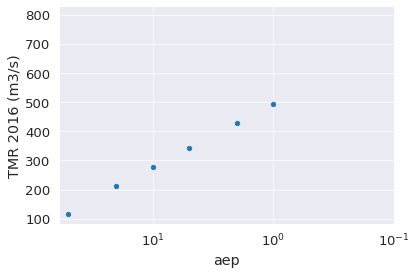

In [0]:
#FFA2 =  FFA2.reset_index()

FFA2['aep'] = FFA2['AEP']*100
FFA2.plot.scatter(x='aep',y='TMR 2016 (m3/s)',xlim=(60,0.1),logx=True)

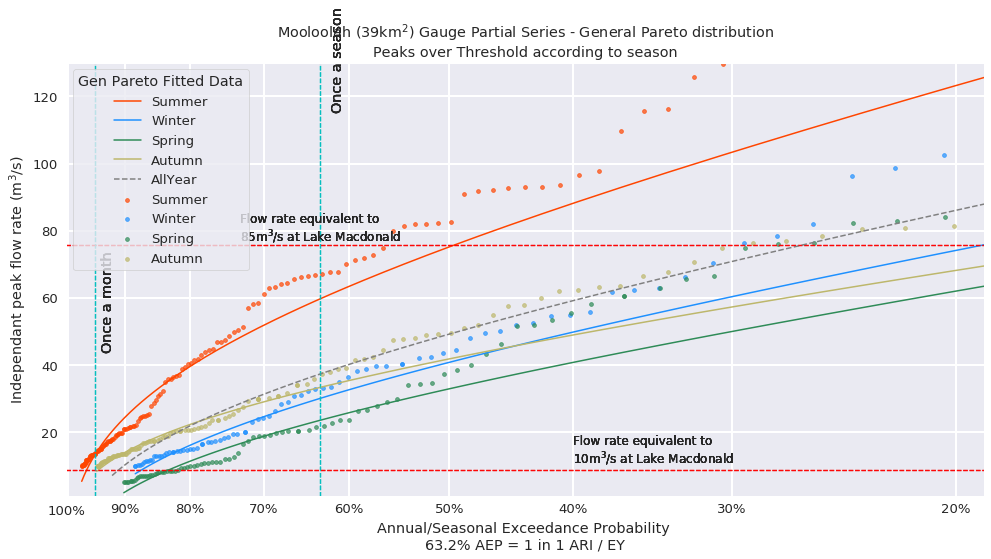

In [0]:
fig

In [0]:


MooloolahIn =r'W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\Inputs\Mooloolah_HourlyData_Discharge\141006A.csv'
EudloIn = r"W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\Inputs\Eudlo_HourlyData_Discharge\141008A.csv"
EumundiIn = r"W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\Inputs\Eumundi_HourlyData_Discharge\141009A.csv"

#fin
MooloolahDaily = r'w:/200_Projects/210_Mary/LakeMacdonald/Hydraulics/2019_ConstructionSupport/Inputs/Mooloolah_DailyData_Discharge/'#141006A.csv'
EudloDaily = r"W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\Inputs\Eudlo_DailyData_Discharge\141008A.csv"
EumundiDaily =r"W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\Inputs\Eumundi_DailyData_Discharge\141009A.csv"

flikeOut = r"C:\TUFLOW Flike\Tools\flike_Bayes_Out.txt"
flike = r'W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\FLIKE\output\Mooloolah_GenPareto_AMS_flike_Bayes_Out.txt'

In [0]:
pout =r'W:\200_Projects\210_Mary\LakeMacdonaldDam\Hydraulics\2019_ConstructionSupport\GoldSim\_postProcessed\Stage2_Demo\Inflows_Jun2019/'

In [0]:
mool = r"W:\200_Projects\210_Mary\LakeMacdonaldDam\Hydraulics\2020_ETI_Support\WorkingFolder\FLIKE\Mooloolah_flike_Bayes_Out-trim.txt"

moolFlike = pd.read_table(mool,delim_whitespace=True,skiprows=3,header=None,na_values=-99)
moolFlike.columns=['1 in Y','Flow-flike','Flow_low-flike','Flow_high-flike','mean','std']

moolFlike['AEP'] = 1./moolFlike['1 in Y']
moolFlike = moolFlike.set_index('AEP')
moolFlike

,1 in Y,Flow-flike,Flow_low-flike,Flow_high-flike,mean,std
AEP,,,,,,
0.909091,1.10,31.74,11.91,45.1,1.4633,0.1980
0.800000,1.25,52.76,39.18,64.9,1.7141,0.0722
0.666667,1.50,70.87,58.28,83.6,1.8476,0.0480
0.571429,1.75,82.16,69.45,95.3,1.9130,0.0420
0.500000,2.00,90.35,77.49,103.8,1.9548,0.0388
0.333333,3.00,110.17,97.04,123.8,2.0419,0.0323
0.200000,5.00,129.09,116.19,143.3,2.1117,0.0282
0.100000,10.00,148.90,135.51,169.0,2.1754,0.0306
0.050000,20.00,164.46,149.29,197.2,2.2206,0.0399


In [0]:
comb = pd.concat([moolFlike,URBSInflow],axis=1)
#comb = comb.interpolate()

#comb = comb.dropna()
comb['mult'] = comb['Flow-flike']/comb['Flow']
comb[['1 in Y','Flow-flike','Flow','mult']]#.to_csv('Comparison.csv')


,1 in Y,Flow-flike,Flow,mult
AEP,,,,
1.000000e-07,NaN,NaN,2106.0,NaN
1.000000e-06,NaN,NaN,1909.0,NaN
2.000000e-06,NaN,NaN,1819.0,NaN
3.333333e-06,NaN,NaN,1745.0,NaN
1.000000e-05,100000.00,NaN,1580.0,NaN
2.000000e-05,50000.00,NaN,1466.0,NaN
5.000000e-05,20000.00,NaN,NaN,NaN
1.000000e-04,10000.00,NaN,1194.0,NaN
2.000000e-04,5000.00,NaN,1078.0,NaN


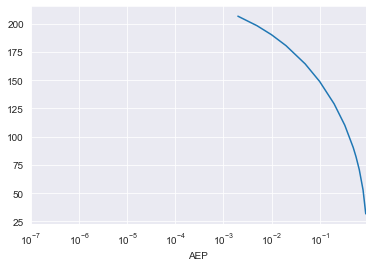

In [0]:
comb['Flow-flike'].plot(logx=True)

In [0]:
import os
os.getcwd()

'C:\\Users\\lmillard\\OneDrive\\PythonProgramming\\A_noteBooks\\ProjectReporting\\LMD'

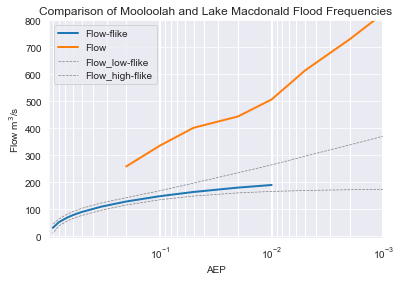

In [0]:
ax = comb[['Flow-flike','Flow']].plot(linewidth=2)
comb[['Flow_low-flike','Flow_high-flike']].plot(ax=ax,logx=True,linestyle='--',c='0.5',linewidth=0.7,xlim=(0.99,0.001))
ax.set_ylim(-5,800)
ax.set_title('Comparison of Mooloolah and Lake Macdonald Flood Frequencies')
ax.set_ylabel('Flow m$^3$/s')
ax.grid(axis='x',which='minor',linewidth=1)
ax.grid(axis='x',which='major',linewidth=2)
fig = ax.get_figure()

fig.savefig('Comparison.png',dpi=300)

In [0]:
## Original 

def getSeason(month):
    #month = int(date.split("/")[0])
    if (month == 12 or month <= 2):
       return "Summer"

    elif (month >=3 and month <= 5):
       return "Autumn"

    elif (month >=6 and month <= 8):
       return "Winter"

    elif (month >=9 and month <= 11):
       return "Spring"

    else:
       return "Error"


DailyData = [MooloolahDaily, EudloDaily, EumundiDaily]
Locations = ['Mooloolah (39km$^2$)','Eudlo (62km$^2$)','Eumundi (38km$^2$)']
Factors = [1.12,0.81,1.14]
Thresholds = [[55,25,18,28,30],[30,14,8,21,15],[30,19,13,22,20]]

for jj, fin in enumerate(DailyData):
    
    Location =  Locations[jj]
    df = pd.read_csv(fin,usecols=[0,5],skiprows=3,index_col=0,skipfooter=3,infer_datetime_format=True,dayfirst=True)
    
    df = df.dropna()
    df['Date'] = pd.to_datetime(df.index)
    df['Month'] = df['Date'].map(lambda x: x.month)
    df['Season'] = df['Month'].apply(getSeason)
    df = df.set_index('Date')
    maxWeek = df.resample('W').max()

    maxWinter = maxWeek[maxWeek['Season']=='Winter']
    maxSpring = maxWeek[maxWeek['Season']=='Spring']
    maxSummer = maxWeek[maxWeek['Season']=='Summer']
    maxAutumn = maxWeek[maxWeek['Season']=='Autumn']

    pout =r'W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\Figures/'

    listDFs = [maxSummer,maxWinter,maxSpring,maxAutumn,maxWeek]
    seasons = ['Summer','Winter','Spring','Autumn','AllYear']
    thresholds = Thresholds[jj] #[35,13,8,18,18]

    colours = ['orangered','dodgerblue','seagreen','darkkhaki','darkblue']
    factor_Season = 1.0

    fig,ax=plt.subplots(figsize=(14,8))


    for ii, POT_filt in enumerate(listDFs): 
        threshold = thresholds[ii]
        season = seasons[ii]
        POT_filt = POT_filt[POT_filt['Max']>threshold]

        ## Bring in the Peak over Threshold data 
        records = POT_filt.shape[0]

        W = POT_filt['Max'].values.max()
        qo = POT_filt['Max'].values.min()

        '''
        ##  Display the data 
        fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(12,5))

        POT_filt['Max'].plot(ax=ax0,marker='o',linewidth=0)
        ax0.set_ylabel('Flow')
        ax0.set_title('Filtered Peaks to Threshold 5m$^3$/s\n %s peaks in 47 years of record'%records)
        sns.distplot(POT_filt['Max'].values,ax=ax1,axlabel='Flow')
        ax1.set_title('Distribution of Filtered Peaks')
        '''
        ## Some basic descriptors

        years_of_record = (POT_filt.index[-1]-POT_filt.index[0]).days
        peaks_over_threshold = POT_filt['Max'].count()

        # the v character
        averagePOT = peaks_over_threshold/years_of_record

        ### Find the L Moments using Gen Pareto distribution (GPA)
        data = POT_filt['Max'].values
        paras = distr.gpa.lmom_fit(data)

        ## Beta = Scale:  2 x L2 
        #q* = Location:   L1 - beta
        # Kappa = Shape
        # Flood Magnitude w 
        # w = q* - beta.log(EY(w)/ v )
        # w = q* - beta*(log(-log(1-AEP)))    

        # Plotting position Eqn 3.2.79 finds AEP so second step converts back to EY
        POT_rank = POT_filt
        POT_rank['rank'] = POT_rank['Max'].rank(ascending=False)

        ##  Eqn 3.2.36 n = no. years i = rank AEP probability
        # Average interval between exceedances of given discharge (ARI)
        POT_rank['T'] = (years_of_record + 0.2) / (POT_rank['rank'] - 0.4)  
        POT_rank['t'] = (1/POT_rank['T'])
        POT_rank['w_EY'] = paras['loc'] - paras['scale']*np.log(POT_rank['t']/averagePOT)
        POT_rank['t2'] = (1/POT_rank['T'])*100
        POT_rank['t2season'] = (POT_rank['t2'])*4

        ##  convert EYs to AEPs
        POT_rank['AEPs_t2'] = (np.exp(POT_rank['t2'])-1)/ np.exp(POT_rank['t2'])*100.
        POT_rank['AEPs_t2season'] = (np.exp(POT_rank['t2season'])-1)/ np.exp(POT_rank['t2season'])*100.

        ## Eqn 3.2.86 Log transformation plotting position   - Had to add =1.0 to get it to bisect the plotted data
        if season == 'AllYear':    
            POT_rank.plot.scatter(x='AEPs_t2',y='Max',ax=ax,label=season, c=colours[ii],marker='.',
                              title='%s Gauge Partial Series - General Pareto distribution\nPeaks over Threshold according to season'%Location)
            POT_rank.plot(x='AEPs_t2',y='w_EY',c=colours[ii],label=season,ax=ax,linewidth=1.5)                    
        else:
            #POT_rank.plot.scatter(x='AEPs_t2season',y='Max',ax=ax,label=season, c=colours[ii])
            #POT_rank.plot(x='AEPs_t2season',y='Max',ax=ax,label=season, c=colours[ii],linewidth=0.5)
            POT_rank.plot(x='AEPs_t2season',y='w_EY',c=colours[ii],label=season,ax=ax,linewidth=0.5)                    

        ax.axhline(85/Factors[jj],c='r',linestyle='--',alpha=0.5)
        ax.axvline(63.2,c='c',linestyle='--',alpha=0.5)
        ax.text(95,86/Factors[jj],'Flow rate equivalent to \n85m$^3$/s at Lake Macdonald')
        ax.semilogx()
        plt.tick_params(axis='x',which='minor')
        ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.0f%%'))

        ax.grid(True,zorder=0)
        ax.grid(which='minor',axis='x',zorder=0,linewidth=2)

        ax.set_xlim(100,5)
        ax.set_ylim(0,140)
        ax.legend()
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos:'%.0f%%'%x))
        ax.set_xlabel('Annual/Seasonal Exceedance Probability \n63.2% AEP = 1 in 1 ARI / EY')
        ax.set_ylabel('Independant peak flow rate (m$^3$/s)')
        
    plt.tight_layout()
    fig.savefig(pout+'PartialSeries_%s_AllSeasons04-AEPs.png' %Location,dpi=300)

In [0]:
Cols = ['Summer','Winter','Spring','Autumn','All_Year']
Mooloolah_85 = [.50,.20,.22,.18,.28]
Eumundi_85 = [.40,.15,.05,.05,.15]
Eudlo_85 = [.23,.09,0.01,.08,0.09]

tmp = pd.DataFrame(index=Cols, columns=['Mooloolah'], data=Mooloolah_85)
tmp1 = pd.DataFrame(index=Cols, columns=['Eumundi'], data=Eumundi_85)
tmp2 = pd.DataFrame(index=Cols, columns=['Eudlo'], data=Eudlo_85)

FlowPred = pd.concat([tmp,tmp1,tmp2],axis=1)

ax = FlowPred.plot.bar(title='Annual/Seasonal Exceedance Probability')
ax.set_title('Annual/Seasonal flow proability of exceeding 85m$^3$/s\nfitted to nearby Gauges')

In [0]:
dfhrs = pd.read_csv(hrin,skiprows=3,usecols=[0,5],skipfooter=3,infer_datetime_format=True,dayfirst=True)
dfhrs.tail()

In [0]:
with open(flikeOut,'r') as f1:
    lines = f1.readlines()
    location = (lines[6]).split('\\')[-1][:-3].split()[0]    
    model = (lines[10].split(':')[-1][:-3].split('  ')[0][1:])
    for ii, l in enumerate(lines):        
        if 'AEP 1 in Y' in l:
            start = ii+3
    
flikeRes = pd.read_table(flikeOut, sep='         ',names=['AEP','Flow','CI1','CI2','Mean','Stdev'], skiprows=start,skipfooter=35)
#flikeRes = flikeRes.dropna()
flikeRes['Model'] = model
flikeRes['Location'] = location
AllData = pd.concat([AllData,flikeRes],axis=0)
flikeRes

In [0]:
AllData.to_csv(r'W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\FLIKE\output\AllModelsLocations_into.csv')


In [0]:
fig,axes =plt.subplots(ncols=4,figsize=(14,4))

colors = ['r','b','g']
factors = {'Eudlo.fld':0.81,'Eumundi.fld':1.14,'Mooloolah.fld':1.12,'SixMile.fld':1}
areas = {'Eudlo.fld':62,'Eumundi.fld':38,'Mooloolah.fld':39,'SixMile.fld':186}
colm = 0
for N,G in AllData.groupby(['Location']):
    if N == 'SixMile.fld':
        break
    cc = 0
    for n,g in G.groupby(['Model']):        
        
        xx = (g['AEP'].values)
        yy = (g['Flow'].values)*factors[N]
        y1 = (g['CI1'].values)#*factors[N]
        y2 = (g['CI2'].values)#*factors[N]
               
        axes[colm].fill_between(xx,y1,y2,alpha=0.3)
        
        
        g.plot.scatter(x='AEP',y='Flow',title=N+' '+str(areas[N])+'km$^2$',label=n,c=colors[cc], logx=True,ax=axes[colm])
        
        y1 = (g['CI1'].values)*factors[N]
        y2 = (g['CI2'].values)*factors[N]
        
        EY = -1.*np.log(1-1./xx) 
        
        axes[3].fill_between(EY,y1,y2,alpha=0.15,color='seagreen')        
        axes[3].plot(EY,yy,c='g',linestyle='--')
        
        axes[3].axhline(85,c='r',alpha=0.5)
        axes[3].axvline(0.35,c='r',alpha=0.15,linewidth=.5)
        axes[3].axvline(1.0,c='r',alpha=0.15,linewidth=.5)
        axes[3].set_title('Flow adjusted to \narea of Lake Macdonald')
        axes[3].set_xlim(0,1.65)
        axes[3].set_ylim(10,100)
        axes[3].set_xlabel('Exceedances per Year')        
        axes[3].grid(True)
        #axes[3].text(1.75,30,'Uncertainty \n1:1.7 to 1:3.1')
        
        axes[1].set_ylabel('')
        axes[2].set_ylabel('')
               
        axes[colm].semilogx()
        cc = cc+ 1
        axes[colm].set_xlim(1,20)
        fifty = g[g['AEP']==20]['Flow'].values[0]
        axes[colm].set_ylim(1,fifty)
        if colm ==2:
            axes[colm].legend(loc=4)
        else:
            axes[colm].get_legend().remove()
        axes[colm].grid(True)#
        axes[colm].grid(which='minor',axis='both',linewidth=0.5)
        
        
        
        
    colm = colm+1
    plt.suptitle('Gauges fitted with Flike models then factored to area',fontweight='bold')

fig.savefig(r'W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\FLIKE\output\AllModelsLocations_into01.png',dpi=300)

In [0]:

## Convert to GridSpec

#fig,axes =plt.subplots(ncols=4,figsize=(14,4))
fig = plt.figure(figsize=(8,8))
axes[0] = plt.subplot2grid((2,3), (0, 0))
axes[1] = plt.subplot2grid((2,3), (0, 1))
axes[2] = plt.subplot2grid((2,3), (0, 2))
axes[3] = plt.subplot2grid((2, 3), (1, 0), colspan=3)

colors = ['r','b','g']
factors = {'Eudlo.fld':0.81,'Eumundi.fld':1.14,'Mooloolah.fld':1.12,'SixMile.fld':1}
areas = {'Eudlo.fld':62,'Eumundi.fld':38,'Mooloolah.fld':39,'SixMile.fld':186}
clr = {'Eudlo.fld':'darkcyan','Eumundi.fld':'goldenrod','Mooloolah.fld':'dodgerblue','SixMile.fld':186}
colm = 0
for N,G in AllData.groupby(['Location']):
    if N == 'SixMile.fld':
        break
    cc = 0
    for n,g in G.groupby(['Model']):        
        
        xx = (g['AEP'].values)
        yy = (g['Flow'].values)*factors[N]
        y1 = (g['CI1'].values)#*factors[N]
        y2 = (g['CI2'].values)#*factors[N]
  
        axes[colm].fill_between(xx,y1,y2,alpha=0.3)
                
        g.plot.scatter(x='AEP',y='Flow',label=n,c=colors[cc], logx=True,ax=axes[colm])
        axes[colm].set_title(N+' '+str(areas[N])+'km$^2$',color=clr[N])
        
        if n == 'Log Pearson III':
            y1 = (g['CI1'].values)*factors[N]
            y2 = (g['CI2'].values)*factors[N]

            EY = -1.*np.log(1-1./xx) 

            #axes[3].fill_between(EY,y1,y2,alpha=0.15,color=clr[N])        
            axes[3].plot(EY,yy,c=clr[N],linestyle='--', linewidth=2.5,
                         label=N+' LPIII Fit x'+str(factors[N]))
        else:
            y1 = (g['CI1'].values)*factors[N]
            y2 = (g['CI2'].values)*factors[N]

            EY = -1.*np.log(1-1./xx) 

            #axes[3].fill_between(EY,y1,y2,alpha=0.15,color=clr[N])        
            axes[3].plot(EY,yy,c=clr[N],linestyle=':',linewidth=2.5,
                         label=N+' GEV Fit x'+str(factors[N]))

        axes[3].axhline(85,c='r',alpha=0.5)
        axes[3].axvline(0.4,c='r',alpha=0.15,linewidth=.5)
        axes[3].axvline(1.0,c='r',alpha=0.15,linewidth=.5)
        axes[3].set_title('Flow adjusted to area of Lake Macdonald (46km$^2$)')
        axes[3].set_xlim(0,1.65)
        axes[3].set_ylim(-5,135)
        axes[3].set_xlabel('Exceedances per Year')        
        axes[3].set_ylabel('Flow (m$^3$/s) factored by Area')    
        axes[3].grid(True)
        axes[3].legend(loc=3)
        axes[3].text(1.1,87,'Target Flow 85 m$^3$/s',color='red')
        
        axes[0].set_ylabel('Flow (m$^3$/s)')
        axes[1].set_ylabel('')
        axes[2].set_ylabel('')
               
        axes[colm].semilogx()
        cc = cc+ 1
        axes[colm].set_xlim(1,20)
        fifty = g[g['AEP']==20]['Flow'].values[0]
        axes[colm].set_ylim(1,fifty)
        if colm >1 :
            axes[colm].legend(loc=4)
        else:
            axes[colm].get_legend().remove()
        axes[colm].grid(True)
        axes[colm].grid(which='minor',axis='both',linewidth=0.5)
        
    colm = colm+1
    plt.suptitle('Gauges fitted with FLIKE models then factored to Area',fontweight='bold')
    plt.tight_layout(rect=[0,0,1,.97])

fig.savefig(r'W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\FLIKE\output\AllModelsLocations_into03.png',dpi=300)

In [0]:
import matplotlib.ticker as ticker
## Convert to GridSpec

#fig,axes =plt.subplots(ncols=4,figsize=(14,4))
fig = plt.figure(figsize=(8,8))
axes[0] = plt.subplot2grid((2,3), (0, 0))
axes[1] = plt.subplot2grid((2,3), (0, 1))
axes[2] = plt.subplot2grid((2,3), (0, 2))
axes[3] = plt.subplot2grid((2, 3), (1, 0), colspan=3)

colors = ['r','b','g']
factors = {'Eudlo.fld':0.81,'Eumundi.fld':1.14,'Mooloolah.fld':1.12,'SixMile.fld':1}
areas = {'Eudlo.fld':62,'Eumundi.fld':38,'Mooloolah.fld':39,'SixMile.fld':186}
clr = {'Eudlo.fld':'darkcyan','Eumundi.fld':'goldenrod','Mooloolah.fld':'dodgerblue','SixMile.fld':186}
colm = 0
for N,G in AllData.groupby(['Location']):
    if N == 'SixMile.fld':
        break
    cc = 0
    for n,g in G.groupby(['Model']):        
        
        xx = (g['AEP'].values)
        yy = (g['Flow'].values)*factors[N]
        y1 = (g['CI1'].values)#*factors[N]
        y2 = (g['CI2'].values)#*factors[N]
  
        axes[colm].fill_between(xx,y1,y2,alpha=0.3)
                
        g.plot.scatter(x='AEP',y='Flow',label=n,c=colors[cc], logx=True,ax=axes[colm])
        axes[colm].set_title(N+' '+str(areas[N])+'km$^2$',color=clr[N])
        
        if n == 'Log Pearson III':
            y1 = (g['CI1'].values)*factors[N]
            y2 = (g['CI2'].values)*factors[N]

            EY = (1./xx)*100. 

            #axes[3].fill_between(EY,y1,y2,alpha=0.15,color=clr[N])        
            axes[3].plot(EY,yy,c=clr[N],linestyle='--', linewidth=2.5,
                         label=N+' LPIII Fit x'+str(factors[N]))
        else:
            y1 = (g['CI1'].values)*factors[N]
            y2 = (g['CI2'].values)*factors[N]

            EY = (1./xx)*100. 

            #axes[3].fill_between(EY,y1,y2,alpha=0.15,color=clr[N])        
            axes[3].plot(EY,yy,c=clr[N],linestyle=':',linewidth=2.5,
                         label=N+' GEV Fit x'+str(factors[N]))

        axes[3].axhline(85,c='r',alpha=0.5)
        axes[3].axvline(32,c='r',alpha=0.15,linewidth=.5)
        axes[3].axvline(62,c='r',alpha=0.15,linewidth=.5)
        axes[3].set_title('Flow adjusted to area of Lake Macdonald (46km$^2$)')
        #axes[3].set_xlim(0,1.65)
        axes[3].set_ylim(-5,135)
        axes[3].set_xlabel('Annual Exceedance Probability (%)')        
        axes[3].set_ylabel('Flow (m$^3$/s) factored by Area')    
        axes[3].grid(True)
        axes[3].legend(loc=3)
        axes[3].text(75,87,'Target Flow 85 m$^3$/s',color='red') 
        axes[3].text(63,100,'n.b. 63.2% AEP is an ARI = 1.0')
        axes[3].text(5,70,'32% AEP is an ARI ~ 2.5')
        axes[3].xaxis.set_minor_locator(ticker.MultipleLocator(5))
        axes[3].yaxis.set_minor_locator(ticker.MultipleLocator(5))
        
        axes[0].set_ylabel('Flow (m$^3$/s)')
        axes[1].set_ylabel('')
        axes[2].set_ylabel('')
               
        axes[colm].semilogx()
        cc = cc+ 1
        axes[colm].set_xlim(1,20)
        fifty = g[g['AEP']==20]['Flow'].values[0]
        axes[colm].set_ylim(1,fifty)
        if colm >1 :
            axes[colm].legend(loc=4)
        else:
            axes[colm].get_legend().remove()
        axes[colm].grid(True)
        axes[colm].grid(which='minor',axis='both',linewidth=0.5)
        
    colm = colm+1
    plt.suptitle('Gauges fitted with FLIKE models then factored to Area',fontweight='bold')
    plt.tight_layout(rect=[0,0,1,.97])

fig.savefig(r'W:\200_Projects\210_Mary\LakeMacdonald\Hydraulics\2019_ConstructionSupport\FLIKE\output\AllModelsLocations_into03.png',dpi=300)